In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [100]:
df = pd.read_csv("Student-Math.csv", sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.89      0.78      0.83        51

    accuracy                           0.80        79
   macro avg       0.78      0.80      0.79        79
weighted avg       0.81      0.80      0.80        79

=== Confusion Matrix ===
[[23  5]
 [11 40]]


/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid 

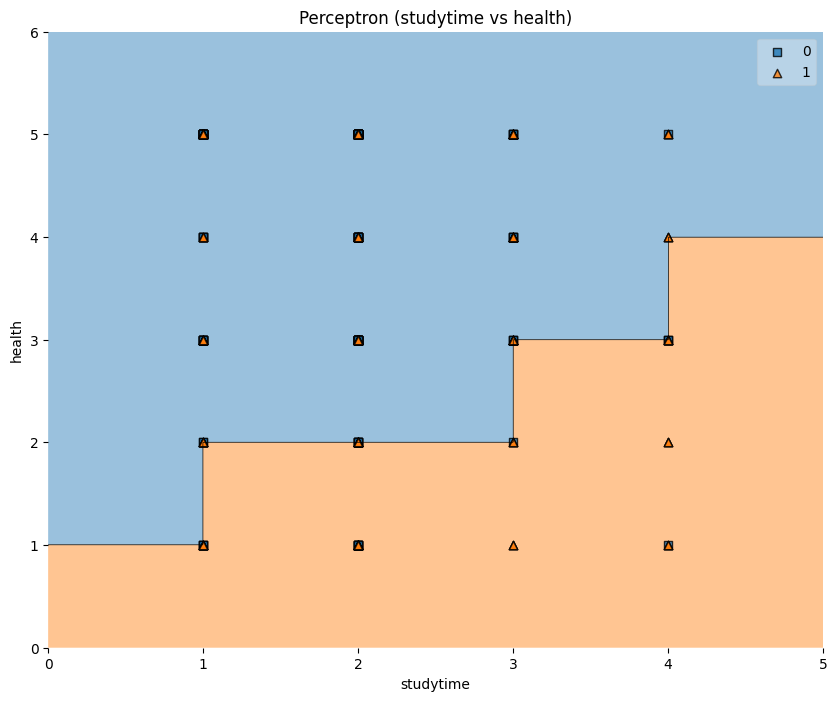

In [97]:
df = df.dropna()

df['pass_fail'] = (df['G1'] >= 10).astype(int)  # 1 = pass, 0 = fail

TARGET = 'pass_fail'
FEATURES = [c for c in df.columns
            if c not in ['G1', TARGET]]

X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_pipeline = Pipeline([('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', numeric_pipeline, numeric_cols),('cat', categorical_pipeline, categorical_cols)])

clf = Pipeline([('preproc', preprocessor),('perc', Perceptron(max_iter=1000,tol=1e-3,eta0=1.0,random_state=42 ))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


feature1 = 'studytime'
feature2 = 'health'

X_vis = X_train[[feature1, feature2]].values

clf_vis = Pipeline([
    ('preproc', ColumnTransformer([
        ('num', numeric_pipeline, [feature1, feature2])
    ])),
    ('perc', Perceptron(max_iter=1000, tol=1e-3, eta0=1.0, random_state=42))
])
clf_vis.fit(X_train[[feature1, feature2]], y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X=X_vis, y=y_train.values, clf=clf_vis.named_steps['perc'])
plt.title('Perceptron (studytime vs health)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


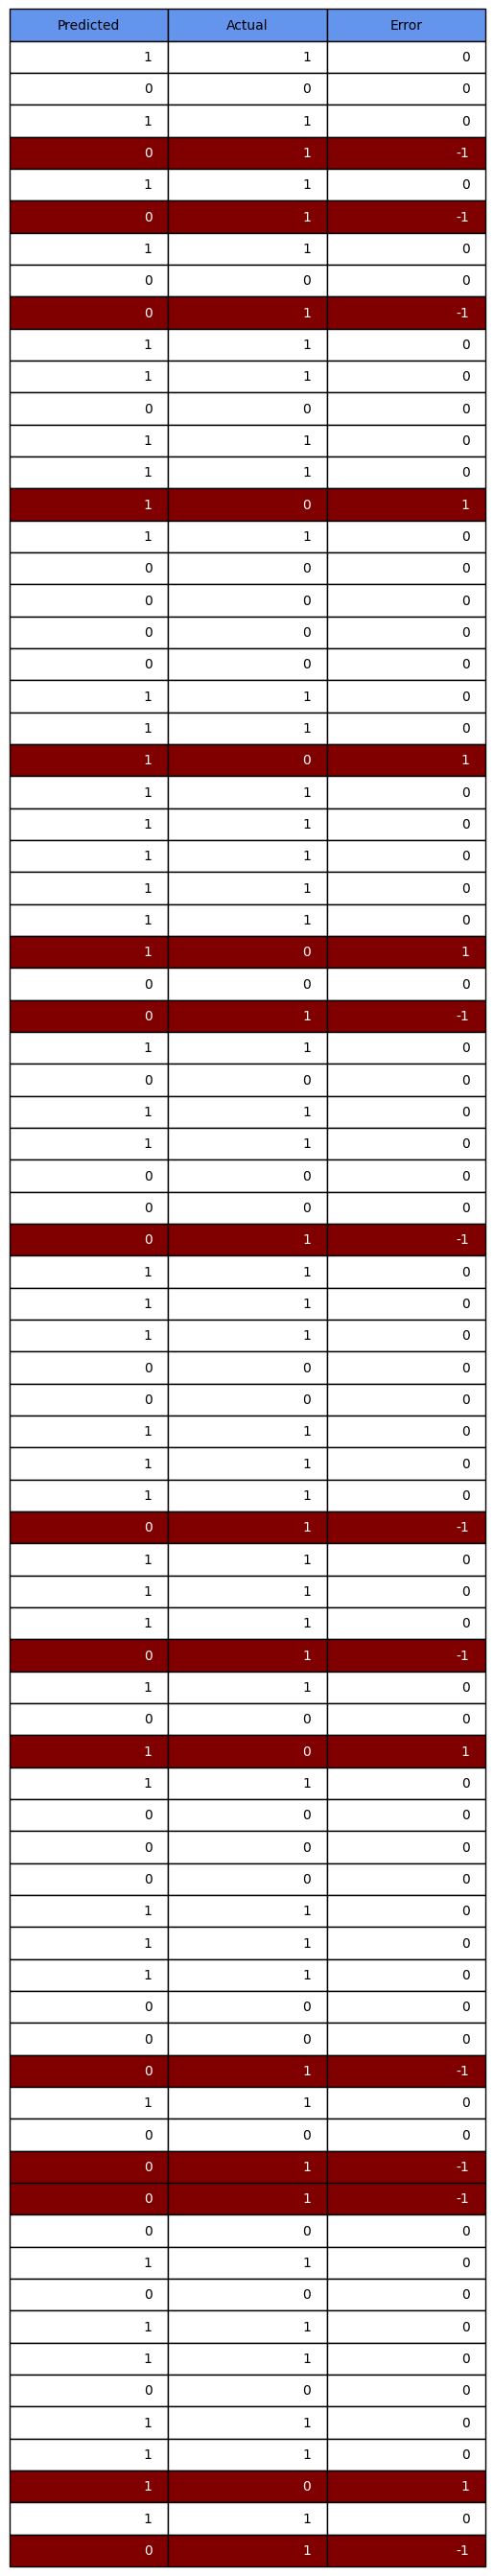

In [98]:
y_hat = clf.predict(X_test)
errors = y_hat - y_test.values 

header = ["Predicted", "Actual", "Error"]
table_data = list(zip(y_hat, y_test.values, errors))

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = plt.table(cellText=table_data, colLabels=header, colColours = ["cornflowerblue"] * len(header), loc='center')
table.scale(1,2)

for i, error in enumerate(errors):
    if error != 0:
        table[(i+1, 0)].set_facecolor('maroon')  # Predicted
        table[(i+1, 1)].set_facecolor('maroon')  # Actual
        table[(i+1, 2)].set_facecolor('maroon')  # Error

        table[(i+1, 0)].get_text().set_color('white')
        table[(i+1, 1)].get_text().set_color('white')
        table[(i+1, 2)].get_text().set_color('white')

Perceptron F score is: 0.83


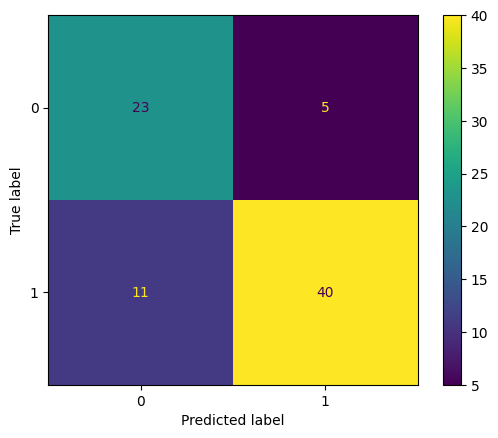

In [99]:
f_pos = f_neg = t_pos = t_neg = 0

for i, value in enumerate(errors):
    if value == 0 and y_test.values[i] == 1:
        t_pos += 1
    elif value == 0 and y_test.values[i] == 0:
        t_neg += 1
    elif value == 1 and y_test.values[i] == 0:
        f_pos += 1
    elif value == -1 and y_test.values[i] == 1:
        f_neg += 1

precision = t_pos / (t_pos + f_pos) if (t_pos + f_pos) > 0 else 0
recall = t_pos / (t_pos + f_neg) if (t_pos + f_neg) > 0 else 0
f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Perceptron F score is: {np.round(f_score, 2)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
